In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "WBData_Further_Cleaned.csv"
data = pd.read_csv(file_path)

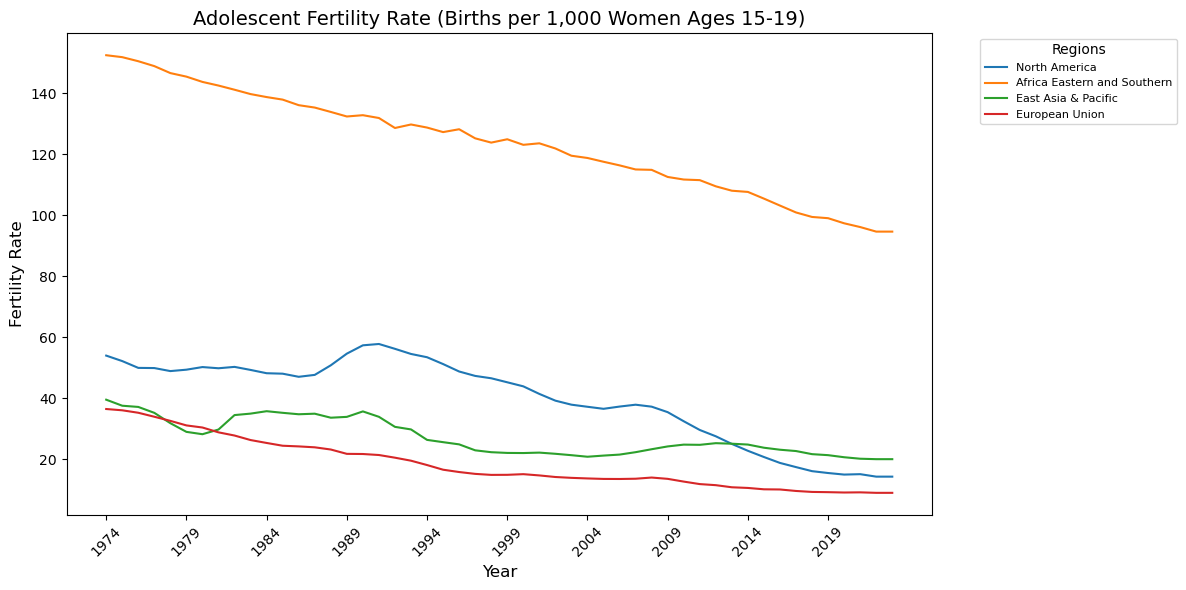

In [3]:
# this is a graph to show the change in adolescent fertility rate over the years
filtered_data = data[data['Series Name'] == 'Adolescent fertility rate (births per 1,000 women ages 15-19)']

# Prepare the data for plotting
filtered_data = filtered_data.drop(columns=['Series Name']).set_index('Country Name').T
filtered_data.index = filtered_data.index.str.replace('Year', '')  # Simplify year labels

# Plot the data
plt.figure(figsize=(12, 6))
for country in filtered_data.columns:
    plt.plot(filtered_data.index, filtered_data[country], label=country)

plt.title('Adolescent Fertility Rate (Births per 1,000 Women Ages 15-19)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fertility Rate', fontsize=12)
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Customize ticks and grid
plt.xticks(ticks=filtered_data.index[::5], rotation=45)  # Show every 5th year
plt.grid(False)  

plt.tight_layout()
plt.show()

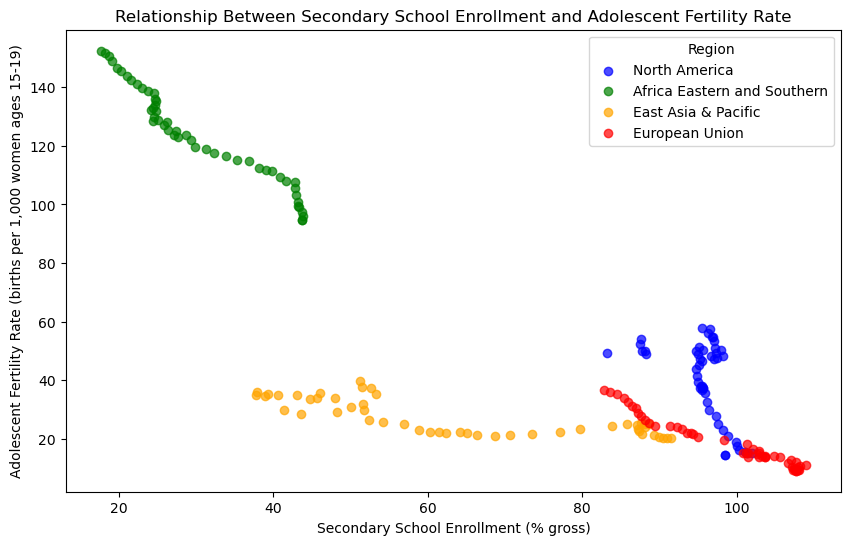

In [ ]:
# this is a scatterplot to show the relationship between secondary school enrollment and adolescent fertility rate; adolescent fertility rate is our y-value, and all the other variables are x-values we're curious in analyzing.

# Reshape the data to include all years
melted_data = data.melt(id_vars=["Country Name", "Series Name"], var_name="Year", value_name="Value")

# Filter relevant data for fertility rate and secondary school enrollment
fertility_data = melted_data[melted_data["Series Name"] == "Adolescent fertility rate (births per 1,000 women ages 15-19)"]
secondary_data = melted_data[melted_data["Series Name"] == "School enrollment, secondary (% gross)"]

# Merge datasets and clean up
merged_data = (
    pd.merge(fertility_data, secondary_data, on=["Country Name", "Year"], suffixes=("_Fertility", "_Secondary"))
)

# Map regions and assign colors
region_colors = {
    "North America": "blue",
    "Africa Eastern and Southern": "green",
    "East Asia & Pacific": "orange",
    "European Union": "red"
}
merged_data["Color"] = merged_data["Country Name"].map(region_colors)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for region, color in region_colors.items():
    group = merged_data[merged_data["Color"] == color]
    plt.scatter(group["Value_Secondary"], group["Value_Fertility"], label=region, color=color, alpha=0.7)

plt.title("Relationship Between Secondary School Enrollment and Adolescent Fertility Rate")
plt.xlabel("Secondary School Enrollment (% gross)")
plt.ylabel("Adolescent Fertility Rate (births per 1,000 women ages 15-19)")
plt.legend(title="Region")
plt.grid(False)
plt.show()

# the graph shows an obvious negative correlation between secondary school enrollment and adolescent fertility rate.


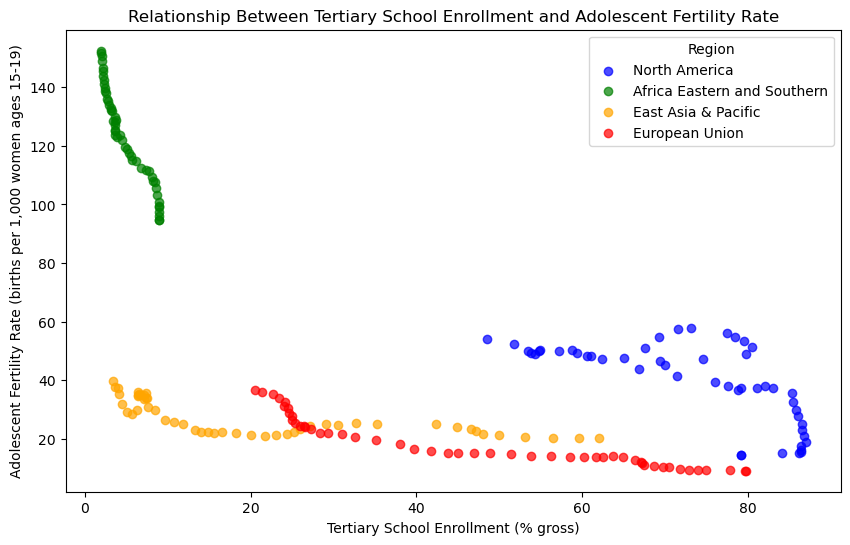

In [ ]:
# this is a scatterplot to show the relationship between tertiary school enrollment and adolescent fertility rate

# Filter relevant data for fertility rate and tertiary school enrollment
tertiary_data = melted_data[melted_data["Series Name"] == "School enrollment, tertiary (% gross)"]

# Merge datasets and clean up
merged_data = (
    pd.merge(fertility_data, tertiary_data, on=["Country Name", "Year"], suffixes=("_Fertility", "_Tertiary"))
    .dropna(subset=["Value_Fertility", "Value_Tertiary"])
)

# Map regions and assign colors
region_colors = {
    "North America": "blue",
    "Africa Eastern and Southern": "green",
    "East Asia & Pacific": "orange",
    "European Union": "red"
}
merged_data["Color"] = merged_data["Country Name"].map(region_colors)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for region, color in region_colors.items():
    group = merged_data[merged_data["Color"] == color]
    plt.scatter(group["Value_Tertiary"], group["Value_Fertility"], label=region, color=color, alpha=0.7)

plt.title("Relationship Between Tertiary School Enrollment and Adolescent Fertility Rate")
plt.xlabel("Tertiary School Enrollment (% gross)")
plt.ylabel("Adolescent Fertility Rate (births per 1,000 women ages 15-19)")
plt.legend(title="Region")
plt.grid(False)
plt.show()

# the graph shows an obvious negative correlation between tertiary school enrollment and adolescent fertility rate; and compared to the previous graph of secondary education, the slope is steeper

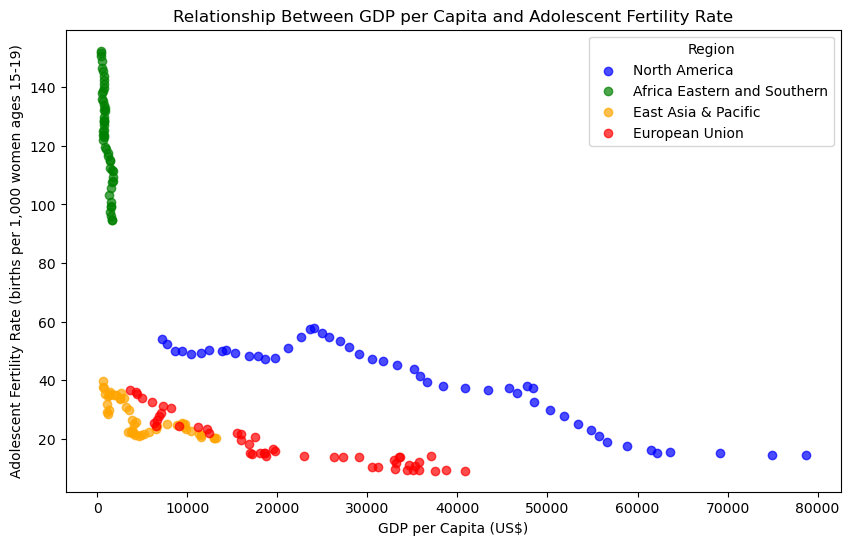

In [ ]:
# Filter relevant data for adolescent fertility and GDP per capita
gdp_data = melted_data[melted_data["Series Name"] == "GDP per capita (current US$)"]

# Merge datasets and clean up
merged_data = (
    pd.merge(fertility_data, gdp_data, on=["Country Name", "Year"], suffixes=("_Fertility", "_GDP"))
    .dropna(subset=["Value_Fertility", "Value_GDP"])
)

# Map regions and assign colors
region_colors = {
    "North America": "blue",
    "Africa Eastern and Southern": "green",
    "East Asia & Pacific": "orange",
    "European Union": "red"
}
merged_data["Color"] = merged_data["Country Name"].map(region_colors)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for region, color in region_colors.items():
    group = merged_data[merged_data["Color"] == color]
    plt.scatter(group["Value_GDP"], group["Value_Fertility"], label=region, color=color, alpha=0.7)

plt.title("Relationship Between GDP per Capita and Adolescent Fertility Rate")
plt.xlabel("GDP per Capita (US$)")
plt.ylabel("Adolescent Fertility Rate (births per 1,000 women ages 15-19)")
plt.legend(title="Region")
plt.grid(False)
plt.show()

# the graph shows an obvious negative correlation between GDP per capita and adolescent fertility rate; and compared to the previous graphs, the slope is the steepest

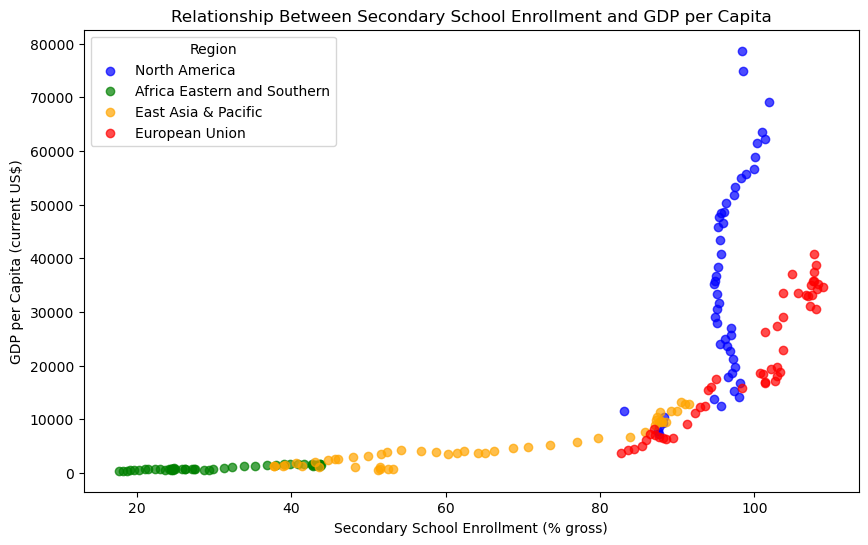

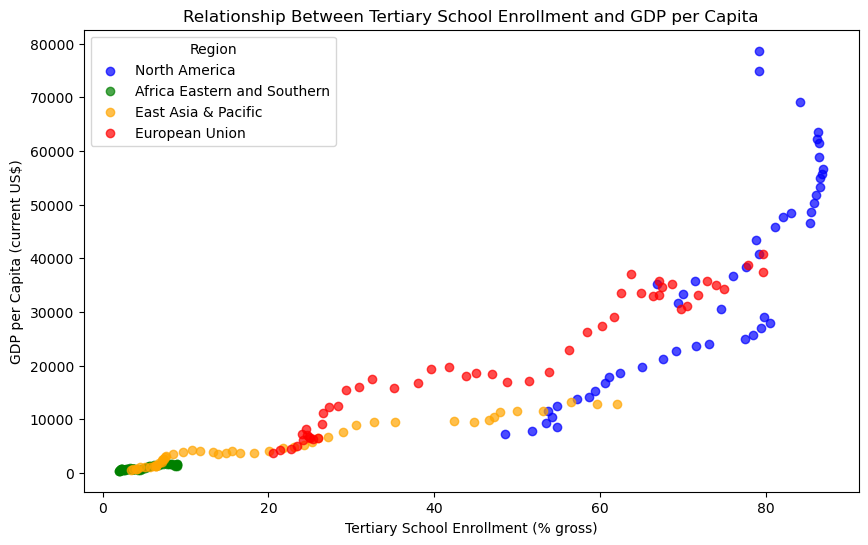

In [8]:
# The last two graphs will show the correlation between GDP per capita and school enrollment

# Filter relevant data for GDP per capita, secondary, and tertiary school enrollment
gdp_data = melted_data[melted_data["Series Name"] == "GDP per capita (current US$)"]
secondary_data = melted_data[melted_data["Series Name"] == "School enrollment, secondary (% gross)"]
tertiary_data = melted_data[melted_data["Series Name"] == "School enrollment, tertiary (% gross)"]

# Merge GDP with secondary school enrollment
merged_secondary = pd.merge(gdp_data, secondary_data, 
                            on=["Country Name", "Year"], 
                            suffixes=("_GDP", "_Secondary"))

# Merge GDP with tertiary school enrollment
merged_tertiary = pd.merge(gdp_data, tertiary_data, 
                           on=["Country Name", "Year"], 
                           suffixes=("_GDP", "_Tertiary"))

# Define regions and assign colors (example mapping, adjust as necessary)
region_colors = {
    "North America": "blue",
    "Africa Eastern and Southern": "green",
    "East Asia & Pacific": "orange",
    "European Union": "red"
}

# Map colors to regions
merged_secondary["Color"] = merged_secondary["Country Name"].map(region_colors)
merged_tertiary["Color"] = merged_tertiary["Country Name"].map(region_colors)

# Plot for secondary school enrollment
plt.figure(figsize=(10, 6))
for region, color in region_colors.items():
    group = merged_secondary[merged_secondary["Color"] == color]
    plt.scatter(group["Value_Secondary"], group["Value_GDP"], label=region, color=color, alpha=0.7)
plt.title("Relationship Between Secondary School Enrollment and GDP per Capita")
plt.xlabel("Secondary School Enrollment (% gross)")
plt.ylabel("GDP per Capita (current US$)")
plt.legend(title="Region")
plt.grid(False)
plt.show()

# Plot for tertiary school enrollment
plt.figure(figsize=(10, 6))
for region, color in region_colors.items():
    group = merged_tertiary[merged_tertiary["Color"] == color]
    plt.scatter(group["Value_Tertiary"], group["Value_GDP"], label=region, color=color, alpha=0.7)
plt.title("Relationship Between Tertiary School Enrollment and GDP per Capita")
plt.xlabel("Tertiary School Enrollment (% gross)")
plt.ylabel("GDP per Capita (current US$)")
plt.legend(title="Region")
plt.grid(False)
plt.show()
